In [27]:
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [28]:
model = keras.models.Sequential([
    keras.Input(shape=(2,)),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1, activation="sigmoid")
])

In [29]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [30]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 261 (1.02 KB)

 Trainable params: 261 (1.02 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
n_train = 15000
cycle = 2

In [32]:
n_train //= 2
theta_train = 2 * cycle * np.pi * np.random.rand(n_train, 1)
X_train_0, y_train_0 = np.array([theta_train/4*np.cos(theta_train), theta_train/4*np.sin(theta_train)]).transpose().reshape((n_train,2)), np.zeros((n_train, 1))
X_train_1, y_train_1 = np.array([(theta_train/4+0.8)*np.cos(theta_train), (theta_train/4+0.8)*np.sin(theta_train)]).transpose().reshape((n_train,2)), np.ones((n_train, 1))
X_train = np.concatenate((X_train_0, X_train_1), axis=0)
y_train = np.concatenate((y_train_0, y_train_1), axis=0)

In [33]:
n_val = n_train // 5
theta_val = 2 * cycle * np.pi * np.random.rand(n_val, 1)
X_val_0, y_val_0 = np.array([theta_val/4*np.cos(theta_val), theta_val/4*np.sin(theta_val)]).transpose().reshape((n_val,2)), np.zeros((n_val, 1))
X_val_1, y_val_1 = np.array([(theta_val/4+0.8)*np.cos(theta_val), (theta_val/4+0.8)*np.sin(theta_val)]).transpose().reshape((n_val,2)), np.ones((n_val, 1))
X_val = np.concatenate((X_val_0, X_val_1), axis=0)
y_val = np.concatenate((y_val_0, y_val_1), axis=0)

In [34]:
history = model.fit(X_train, y_train, epochs=100, batch_size=1024, validation_data=(X_val, y_val))

Epoch 1/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.2425 - val_loss: 0.2403
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2396 - val_loss: 0.2374
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2362 - val_loss: 0.2343
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2327 - val_loss: 0.2310
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2296 - val_loss: 0.2277
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2270 - val_loss: 0.2238
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2216 - val_loss: 0.2194
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2178 - val_loss: 0.2149
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2136 - val_loss: 0.2100
Epoch 10/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2078 - val_loss: 0.2060
Epoch 11/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2037 - val_loss: 0.2028
Epoch 12/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2

In [35]:
n_test = n_train // 5
theta_test = 2 * cycle * np.pi * np.random.rand(n_test, 1)
X_test_0, y_test_0 = np.array([theta_test/4*np.cos(theta_test), theta_test/4*np.sin(theta_test)]).transpose().reshape((n_test,2)), np.zeros((n_test, 1))
X_test_1, y_test_1 = np.array([(theta_test/4+0.8)*np.cos(theta_test), (theta_test/4+0.8)*np.sin(theta_test)]).transpose().reshape((n_test,2)), np.ones((n_test, 1))
X_test = np.concatenate((X_test_0, X_test_1), axis=0)
y_test = np.concatenate((y_test_0, y_test_1), axis=0)

In [36]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


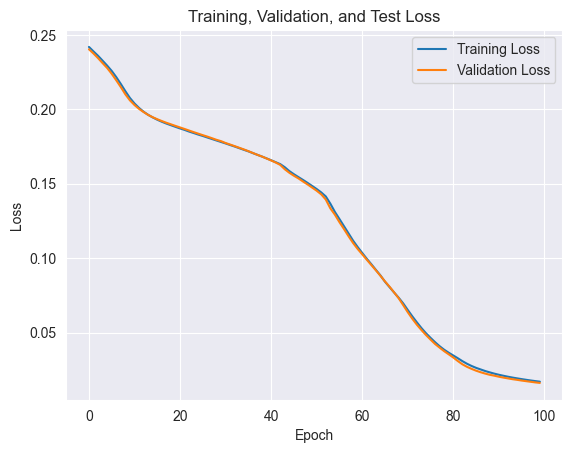

In [37]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

In [38]:
cm = confusion_matrix(y_test, y_pred)

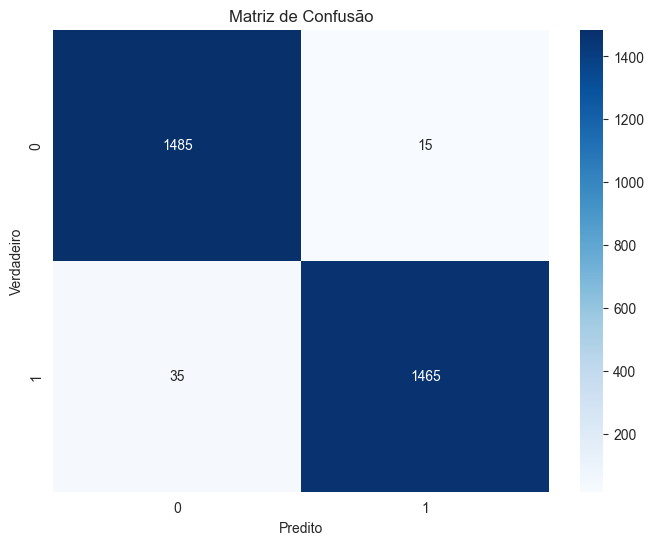

In [39]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Verdadeiro")
plt.show()